**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from scipy import optimize
import time
import sympy as sm
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# define symbols
alpha = sm.symbols('alpha', positive=True)
C = sm.symbols('C')
G = sm.symbols('G', positive=True)
nu = sm.symbols('nu', positive=True)
L = sm.symbols('L')
kappa = sm.symbols('kappa', positive=True)
tau = sm.symbols('tau', positive=True)
w = sm.symbols('w', positive=True)
wtilde = sm.symbols('wtilde', positive=True)
Lstar = sm.symbols('L^*')

# define utility and budget constraint
util = sm.log(C**alpha * G**(1-alpha)) - nu * (L**2)/2
cons = kappa + (1-tau)*w*L

# insert omega_tilde in budget constraint and then into utility function
cons = cons.subs(w*(1-tau), wtilde)
util = util.subs(C, cons)

# take the derivative of the utility function with respect to labor
util_diff = sm.diff(util, L)

# solve for the optimal labor supply
optimal_labor = sm.solve(util_diff, L)[1] # we take the second solution since the first is negative

# insert wtilde into the optimal labor supply
optimal_labor_expanded = optimal_labor.subs(wtilde, w*(1-tau))

display(sm.Eq(Lstar,optimal_labor))



Eq(L^*, -kappa/(2*wtilde) + sqrt(4*alpha*wtilde**2 + kappa**2*nu)/(2*sqrt(nu)*wtilde))

In [3]:
# define symbols
alpha = sm.symbols('alpha', positive=True)
C = sm.symbols('C')
G = sm.symbols('G', positive=True)
nu = sm.symbols('nu', positive=True)
L = sm.symbols('L')
kappa = sm.symbols('kappa', positive=True)
tau = sm.symbols('tau', positive=True)
w = sm.symbols('w', positive=True)
wtilde = sm.symbols('wtilde', positive=True)
Lstar = sm.symbols('L^*')

# define utility and budget constraint
util = sm.log(C**alpha * G**(1-alpha)) - nu * (L**2)/2
cons = kappa + (1-tau)*w*L

cons = cons.subs(w*(1-tau), wtilde)

cons

L*wtilde + kappa

Though sympy simplifies the problem sligthly differently, this is equialvent to

$$
L^* = \frac{-\kappa + \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}
$$

As should be verified.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

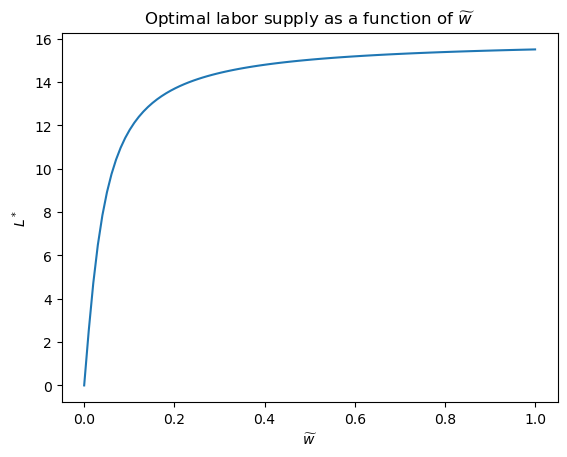

In [4]:
# lambdify the optimal labor supply
labor_func = sm.lambdify((alpha, nu, kappa, wtilde), optimal_labor)

# create np.array of w_tilde values and calculate optimal labor supply
wtilde_vec = np.linspace(0.0000001, 1, 100)
labor_vec = labor_func(alpha=0.5, kappa=1.0, nu=1/(2*16**2), wtilde=wtilde_vec)

# plot optimal labor supply as a function of w_tilde
fig = plt.figure()
ax = plt.axes()
ax.plot(wtilde_vec, labor_vec)
ax.set_xlabel('$\widetilde{w}$')
ax.set_ylabel('$L^*$')
ax.set_title('Optimal labor supply as a function of $\widetilde{w}$')
plt.show()




We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/var/folders/3r/1kv5zyk92gj7vdrjg4lsysm80000gn/T/ipykernel_13830/985984588.py:3: RuntimeWarning: invalid value encountered in true_divide
  return (-kappa + np.sqrt(kappa**2 + 4 * (alpha/nu) * w**2 * (1-tau)**2)) / (2 * w * (1-tau))
/var/folders/3r/1kv5zyk92gj7vdrjg4lsysm80000gn/T/ipykernel_13830/985984588.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(consumption(w=w, tau=tau, kappa=kappa, alpha=alpha, nu=nu)**alpha * government(w=w, tau=tau, alpha=alpha, nu=nu, kappa=kappa)**(1-alpha)) - nu * (labour(alpha=alpha, nu=nu, kappa=kappa, w=w, tau=tau)**2)/2


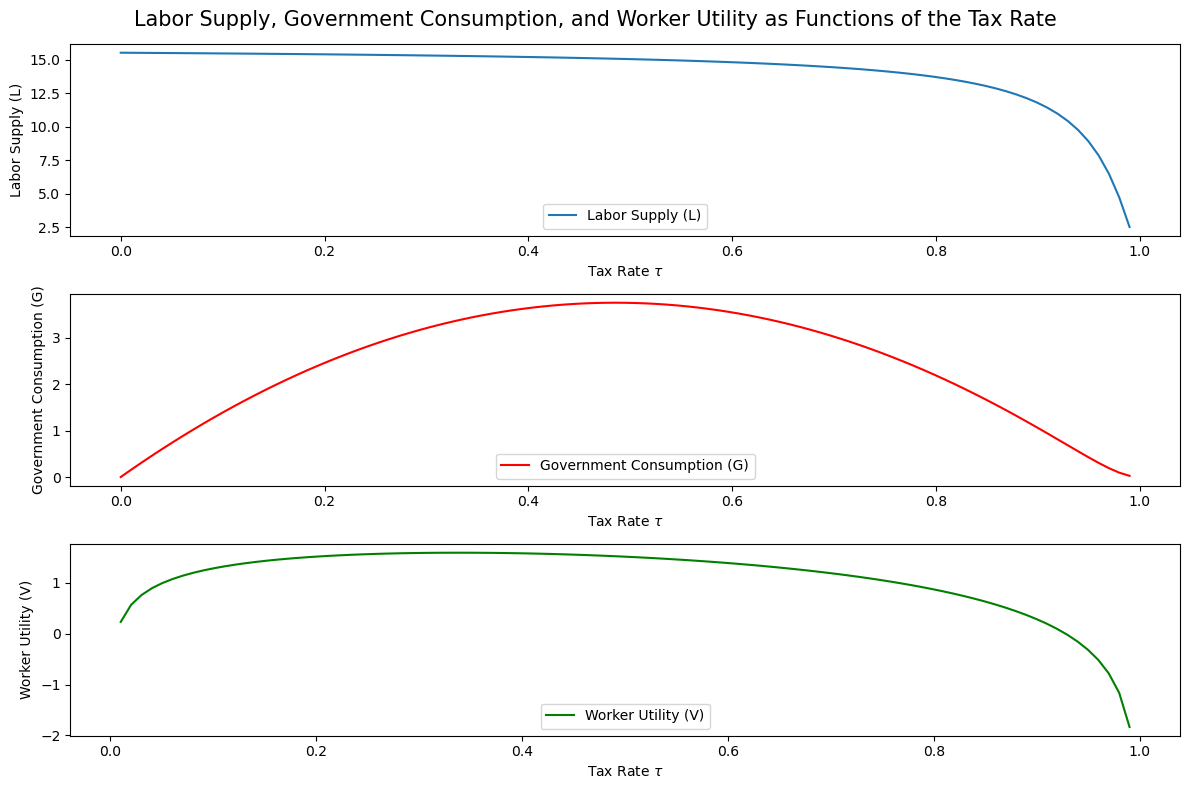

[       -inf  0.23017043  0.56664017  0.75916565  0.89269428  0.99384611
  1.07447712  1.14091055  1.19691976  1.24493774  1.28662481  1.3231644
  1.35542953  1.38408242  1.40963708  1.43250027  1.45299923  1.47140089
  1.48792572  1.50275771  1.51605183  1.52793972  1.53853393  1.54793133
  1.55621573  1.56346     1.56972771  1.57507454  1.57954938  1.58319523
  1.58604997  1.58814699  1.58951572  1.59018207  1.5901688   1.58949584
  1.58818055  1.58623796  1.58368097  1.58052049  1.57676557  1.57242356
  1.56750017  1.56199955  1.55592438  1.54927588  1.54205388  1.53425683
  1.5258818   1.51692451  1.5073793   1.4972391   1.48649544  1.47513834
  1.46315632  1.4505363   1.4372635   1.42332139  1.40869153  1.39335347
  1.37728456  1.3604598   1.34285165  1.32442975  1.30516065  1.28500756
  1.26392989  1.24188291  1.21881721  1.19467815  1.16940517  1.142931
  1.11518074  1.08607075  1.05550727  1.02338485  0.98958439  0.95397074
  0.91638977  0.87666466  0.83459131  0.78993238  0.74

In [5]:
# lampdify the labor expanded optimal supply function 
def labour(alpha, nu, kappa, w, tau):
    return (-kappa + np.sqrt(kappa**2 + 4 * (alpha/nu) * w**2 * (1-tau)**2)) / (2 * w * (1-tau))

# setup function for government
def government(w, tau, alpha, nu, kappa):
    return tau * w * labour(alpha=alpha, nu=nu, kappa=kappa, w=w, tau=tau) * (1-tau) * w

# setup function for consumption
def consumption(w, tau, kappa, alpha, nu):
    return kappa + (1-tau) * w * labour(alpha=alpha, nu=nu, kappa=kappa, w=w, tau=tau)

# setup function for utility
def utility(w, tau, kappa, alpha, nu):
    return np.log(consumption(w=w, tau=tau, kappa=kappa, alpha=alpha, nu=nu)**alpha * government(w=w, tau=tau, alpha=alpha, nu=nu, kappa=kappa)**(1-alpha)) - nu * (labour(alpha=alpha, nu=nu, kappa=kappa, w=w, tau=tau)**2)/2

# create array of tau values and calculate optimal labor supply, government spending, and utility
tau_vec = np.linspace(0.0, 1.0, 100)
labour_vec = labour(alpha=0.5, nu=1/(2*16**2), kappa=1.0, w=1.0, tau=tau_vec)
gov_vec = government(w=1.0, tau=tau_vec, alpha=0.5, nu=1/(2*16**2), kappa=1.0)
util_vec = utility(w=1.0, tau=tau_vec, kappa=1.0, alpha=0.5, nu=1/(2*16**2))

# Plot L, G, and V as functions of tau
plt.figure(figsize=(12, 8))

# create title for the whole plot
plt.suptitle('Labor Supply, Government Consumption, and Worker Utility as Functions of the Tax Rate', fontsize = 15)

# create fig size
fig.set_figwidth(15)
fig.set_figheight(10)

# create subplots
plt.subplot(3, 1, 1)
plt.plot(tau_vec, labour_vec, label='Labor Supply (L)')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Labor Supply (L)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center')

plt.subplot(3, 1, 2)
plt.plot(tau_vec, gov_vec, label='Government Consumption (G)', color = 'red')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Government Consumption (G)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center')

plt.subplot(3, 1, 3)
plt.plot(tau_vec, util_vec, label='Worker Utility (V)', color = 'green')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Worker Utility (V)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center')

plt.tight_layout()
plt.show()


print(util_vec)


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [6]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

To solve this we call the ```griewank_minimizer``` defined in [examproject.py](examproject.py)

In [14]:
# defining the global minmizer with multi-start method
def griewank_minimizer(brackets = [-600,600], tau = 10**(-8), warm_up_K = 10, K = 1000, seed = 2023, do_print = False):
    """
    The refined global minimizer of the Griewank function using a multi-start method.

    Parameters
        brackets (array): the brackets for the uniform distribution
        tau (float): the threshold for the stopping criterion
        warm_up_K (int): the number of iterations before the algorithm starts updating x
        K (int): the number of iterations
        seed (int): the seed for the random number generator
        do_print (bool): whether to print the result

    Returns
        dict: a dictionary with the solution, the number of iterations and the value of the function
    """

    np.random.seed(seed)
    # a. draw random points from the uniform distribution
    x = np.random.uniform(brackets[0],brackets[1],(K,2))
    #x2 = np.random.uniform(brackets[0],brackets[1],K)
    #x = np.array([x1,x2]).T

    # set number of iterations to 0
    k = 0
    while k < K:
        # b. control if still warming up
        if k >= warm_up_K:
            # c. calculate chi_k 
            chi_k = 0.5 * (2 / (1 + np.exp((k - warm_up_K) / 100)))
            # d. update x
            x[k] = chi_k*x[k] + (1-chi_k)*x_star
        # e. minimize using the scipy.optimize.minimize with BFGS method
        x_opt = optimize.minimize(fun=griewank, x0=x[k], method = 'BFGS').x
        # f. set optimal value as x_star
        if k == 0:
            x_star = x_opt
        elif griewank(x_opt) < griewank(x_star):
            x_star = x_opt
        # update k
        k += 1
        # g. check if x_star is below threshold
        if griewank(x_star) < tau:
            value = griewank(x_star)
            if do_print:
                print(f'The global minimum is approximately: f = {value:.2e}\n' 
                      f'The solution is x_1 = {x_star[0]:.2e} and x_2 = {x_star[1]:.2e} \n'
                      f'Iterations: {k}')
            # 4. return x_star as x_star and k as number of iterations as a dictionary
            return {'sol':x_star, 'iter':k, 'value':value}
        
sol10 = griewank_minimizer(do_print = True)

print(f'Is close to true global mimum: {np.isclose(sol10["value"], 0)}')

The global minimum is approximately: f = 1.56e-12
The solution is x_1 = 9.47e-07 and x_2 = -2.11e-06 
Iterations: 369
Is close to true global mimum: True


We see that our solution is practically equal to the true global minimum, which is what we want. This took 369 iterations to find.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

We again call the ```griewank_minimizer``` defined in [examproject.py](examproject.py) now with $\underline{K} = 100$.

In [15]:
sol100 = griewank_minimizer(warm_up_K=100, do_print = True)
print(f'Is close to true global mimum: {np.isclose(sol100["value"], 0)}')

The global minimum is approximately: f = 1.06e-12
The solution is x_1 = -1.30e-06 and x_2 = 9.22e-07 
Iterations: 353
Is close to true global mimum: True


We again get a result practically equal to the true global minimum. This time it took 353 iterations to find. Thus it did converge faster.
However, we do not know if it takes longer to run thus, we will test this.

In [16]:
%timeit -n 10 -r 10 griewank_minimizer()
%timeit -n 10 -r 10 griewank_minimizer(warm_up_K=100)

469 ms ± 6.25 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
455 ms ± 5.87 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


We aditionally see that the function also runs faster with $\underline{K} = 100$. Thus we conclude that for this seed (2023) it is a better idea to set $\underline{K} = 100$. However, this might differ for other seeds as the time it takes to run the function is very close to the same.

In [17]:

# defining the global minmizer with multi-start method
def griewank_minimizer3(brackets = [-600,600], tau = 10**(-8), warm_up_K = 10, K = 1000):
    np.random.seed(2023)
    # i. draw random points from the uniform distribution for K iterations
    x1 = np.random.uniform(brackets[0],brackets[1],K)
    x2 = np.random.uniform(brackets[0],brackets[1],K)
    x = np.array([x1,x2]).T
    
    k = 0
    while k < warm_up_K:
        # ii. minimize using the scipy.optimize.minimize with BFGS method
        x_opt = optimize.minimize(fun=griewank, x0=x[k], method = 'BFGS').x
        # iii. set optimal value as x_star
        if k == 0:
            x_star = x_opt
        elif griewank(x_opt) < griewank(x_star):
            x_star = x_opt
        # iv. update k
        k += 1
        # v. check if x_star is below threshold
        if griewank(x_star) < tau:
            return x_star, k
    
    while k >= warm_up_K and k < K:
        chi_k = 0.5 * (2 / (1 + np.exp((k - warm_up_K) / 100)))
        x[k] = chi_k*x[k] + (1-chi_k)*x_star

        # ii. minimize using the scipy.optimize.minimize with BFGS method
        x_opt = optimize.minimize(fun=griewank, x0=x[k], method = 'BFGS').x
        # iii. set optimal value as x_star
        if k == 0:
            x_star = x_opt
        elif griewank(x_opt) < griewank(x_star):
            x_star = x_opt
        # iv. update k
        k += 1
        # v. check if x_star is below threshold
        if griewank(x_star) < tau:
            # return x_star as x_star and k as number of iterations
            return [x_star, k]


sol = griewank_minimizer3(warm_up_K=10)[0]
iter = griewank_minimizer3(warm_up_K=10)[1]

val = griewank(sol)

np.isclose(val,0,atol=10**(-8))
print(iter)



383


In [18]:
# defining the global minmizer with multi-start method
def griewank_minimizer_opt2(brackets = [-600,600], tau = 10**(-8), warm_up_K = 10, K = 1000):
    np.random.seed(203)
    k = 0
    while k < K:
        # a. draw random points from the uniform distribution
        x1 = np.random.uniform(brackets[0],brackets[1])
        x2 = np.random.uniform(brackets[0],brackets[1])
        x = np.array([x1,x2])
        # b. control if still warming up
        if k >= warm_up_K:
            # c. calculate chi_k 
            chi_k = 0.5 * (2 / (1 + np.exp((k - warm_up_K) / 100)))
            # d. update x
            x = chi_k*x + (1-chi_k)*x_star
        # e. minimize using the scipy.optimize.minimize with BFGS method
        x_opt = optimize.minimize(fun=griewank, x0=x, method = 'BFGS').x
        # f. set optimal value as x_star
        if k == 0:
            x_star = x_opt
        elif griewank(x_opt) < griewank(x_star):
            x_star = x_opt
        # update k
        k += 1
        # g. check if x_star is below threshold
        if griewank(x_star) < tau:
            # 4. return x_star as x_star and k as number of iterations
            return x_star, k
        
griewank_minimizer_opt2(warm_up_K=100)
        

(array([ 3.21156114e-08, -1.25444451e-07]), 436)